### Data Visualizations Using Histograms And Box Plots

#### DataSet Used
This directory contains the <a href="https://github.com/fivethirtyeight/data/tree/master/fandango" target="_blank">Data</a> behind the story  **Be Suspicious Of Online Movie Ratings, Especially Fandango’s**



#### Data Details
| Column      | Definition |
| :---------- | :--------- |
| FILM      | Film name       |
| RT_user_norm   | Average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale|
| Metacritic_user_nom      | Average user rating from Metacritic, normalized to a 1 to 5 point scale       |
| IMDB_norm   | Average user rating from IMDB, normalized to a 1 to 5 point scale        |
| Fandango_Ratingvalue      | average user rating from Fandango, normalized to a 1 to 5 point scale|
| Fandango_Stars   | The rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)|


#### Data Introduction

In [16]:
#1. Data Introduction

import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
        'Fandango_Ratingvalue']

norm_reviews = reviews[cols]
norm_reviews[:5]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5
1,Cinderella (2015),4.0,3.75,3.55,4.5
2,Ant-Man (2015),4.5,4.05,3.90,4.5
3,Do You Believe? (2015),4.2,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0


#### Frequency Distribution
A column's frequency distribution consists of the unique values in that column along with the count for each of those values or their frequency.

In [17]:
# 2. Frequency Distribution

import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
        'Fandango_Ratingvalue']

norm_reviews = reviews[cols]

fandango_freq_distri = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_freq_distri = fandango_freq_distri.sort_index()

imdb_freq_distri = norm_reviews['IMDB_norm'].value_counts()
imdb_freq_distri = imdb_freq_distri.sort_index()

print('[Fandango_Ratingvalue]Frequency Distribution')
#print(fandango_freq_distri.iloc[0:6], '\n')
print(fandango_freq_distri, '\n')

print('[IMDB_Norm]Frequency Distribution')
print(imdb_freq_distri.iloc[0:6], '\n')

print('[Fandango_Ratingvalue]Unique Index Count', len(fandango_freq_distri.index.unique()))
print('[IMDB_norm]Unique Index Count', len(imdb_freq_distri.index.unique()))

[Fandango_Ratingvalue]Frequency Distribution
2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64 

[IMDB_Norm]Frequency Distribution
2.00    1
2.10    1
2.15    1
2.20    1
2.30    2
2.45    2
Name: IMDB_norm, dtype: int64 

[Fandango_Ratingvalue]Unique Index Count 21
[IMDB_norm]Unique Index Count 41


#### Binning
Comparing frequency distributions is also challenging because the **Fandango_Ratingvalue**
column contains **21** unique values while **IMDB_norm** contains **41** unique values.
We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a values into a series of fixed length intervals, called **Bins**. 
We can then sum the frequencies for the values that fall into each bin.

![title](img/Binning_1.png)

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a histogram.

#### Histogram in Matplotlib
While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:
* Calculate the minimum and maximum value from the sequence of values we passed in 
* Create **10 bins(default)** of equal length that span the range from the minimum to the maximum value
* Group unique values into the bins
* Sum up the associated unique values
* Generate a bar for the frequency sum for each bin

The default behavior of Axes.hist() is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the range parameter to specify the range we want matplotlib to use as a tuple:

`ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))`


0      4.5
1      4.5
2      4.5
3      4.5
4      3.0
      ... 
141    4.0
142    3.5
143    3.5
144    3.5
145    3.5
Name: Fandango_Ratingvalue, Length: 146, dtype: float64


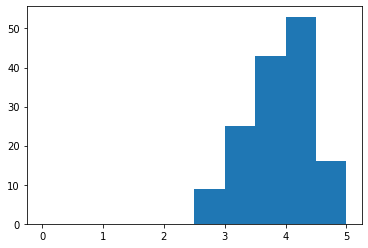

In [18]:
#4. Histogram in matplotlib

import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
        'Fandango_Ratingvalue']
norm_reviews = reviews[cols]

fig, ax = plt.subplots()
print(norm_reviews['Fandango_Ratingvalue'])
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

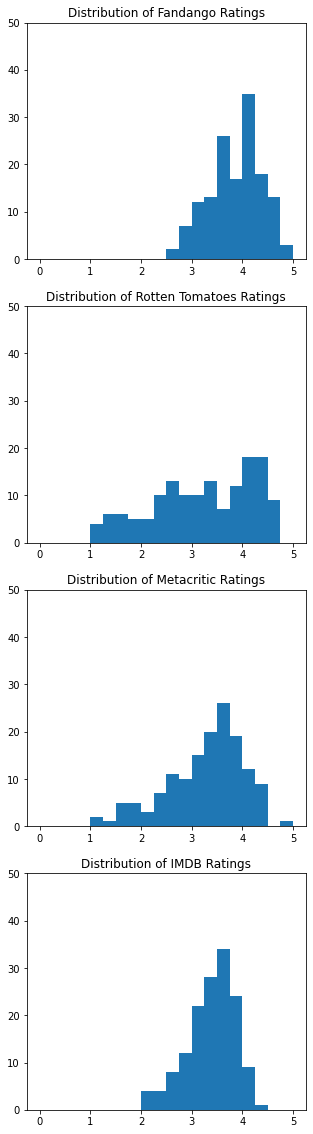

In [19]:
#5. Comparing Histograms
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
        'Fandango_Ratingvalue']
norm_reviews = reviews[cols]

fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where **each region contains 1/4th of the total values**.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quartile covers an equal number of values (1/4th of the total values). To visualize **quartiles**, we need to use a box plot, also referred to as a **box-and-whisker plot**.

#### Box Plot
A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way. Here's a box plot of the values in the RT_user_norm column
![title](img/BoxPlot_1.png)

0      4.30
1      4.00
2      4.50
3      4.20
4      1.40
       ... 
141    3.90
142    4.10
143    3.90
144    4.05
145    3.15
Name: RT_user_norm, Length: 146, dtype: float64


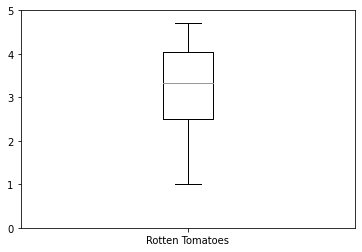

In [5]:
#7. Box Plot
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('../../datasets/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 
        'Fandango_Ratingvalue']
norm_reviews = reviews[cols]

fig, ax = plt.subplots()
print(norm_reviews['RT_user_norm'])
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

From the above box plot generated using rotten tomatoes ratings, we can conclude that,
* The bottom 25% of user ratings range from around 1 to 2.5
* The top 25% of user ratings range from around 4 to 4.6

#### Multiple Box Plots
To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. 
When selecting multiple columns to pass in to Axes.boxplot(), we need to use the values accessor to return a multi-dimensional numpy array



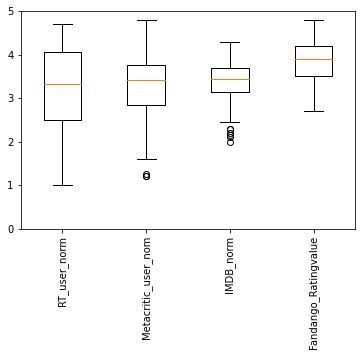

In [7]:
#8. Multiple Box Plots
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0, 5)
plt.show()

From the above boxplot, we can reach the following conclusion:
* User ratings from rotten tomatoes and metacritic span a larger range of values
* User ratings from IMDB and Fandango are both skewed in the positive direction and span more constrained range of values.
In addition, you may have noticed there are a couple of user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called **Outliers** or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.